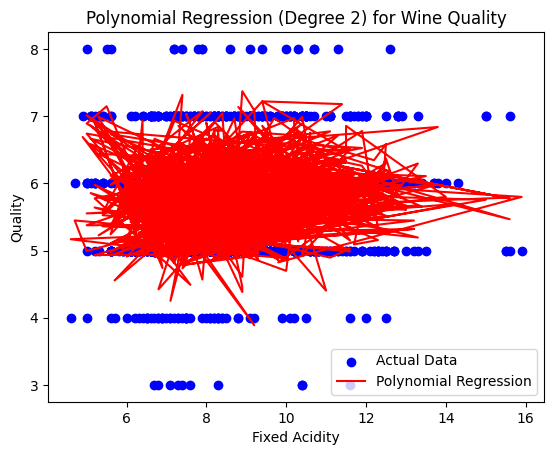

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Step 1: Load Data
data = pd.read_csv('/content/winequality-red.csv')  # Make sure the dataset is in the correct path

# Step 2: Handle Missing Data (if any)
# Check for missing values and impute them (if necessary)
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)  # Impute missing values

# Step 3: Select Features and Target Variable
X = data[['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
          'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values  # Independent variables
y = data['quality'].values  # Dependent variable (wine quality)

# Step 4: Feature Scaling (Optional for polynomial regression)
# Polynomial features (optional: you can change the degree of the polynomial)
poly = PolynomialFeatures(degree=2)  # Degree of polynomial features
X_poly = poly.fit_transform(X)

# Step 5: Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# Step 6: Predict Values
y_pred = model.predict(X_poly)

# Step 7: Plotting the results (Visualizing Polynomial Regression Model)
# Note: We will plot only one feature against the target for better visualization
plt.scatter(X[:, 0], y, color='blue', label='Actual Data')  # Actual data points (for example: 'fixed acidity' vs 'quality')
plt.plot(X[:, 0], y_pred, color='red', label='Polynomial Regression')  # Predicted curve
plt.title('Polynomial Regression (Degree 2) for Wine Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.legend()
plt.show()
